#### API's and Data Visualization

This week we introduced working with an API to access data, and some additional plotting functionality through the `seaborn` library.  In the assignment, you will use the `yfinance` library to access data and use `matplotlib` and `seaborn` to visualize the data.  Alternatively you can use `bokeh` for an extra challenge.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

**NOTE**: Make sure you can load the `yfinance` library -- if not uncomment the cell below and run the installation.

**Problem 1**

Make sure to sign up for a new API Key from Alpha Vantage [here](https://www.alphavantage.co/).  Assign this key to the variable `api_key` below.

In [2]:
api_key = 'W000UNOPUW8NNRTA'


**Problem 2**

Extract the `TIME_SERIES_DALY` for Tesla and GM for years 2019 - present.  Draw side by side line plots using `matplotlib`.  Add appropriate titles and labels, adjust the figure size to `(20, 5)`.  

In [3]:
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "",
        "symbol": "",
        "apikey": ""
    }
)

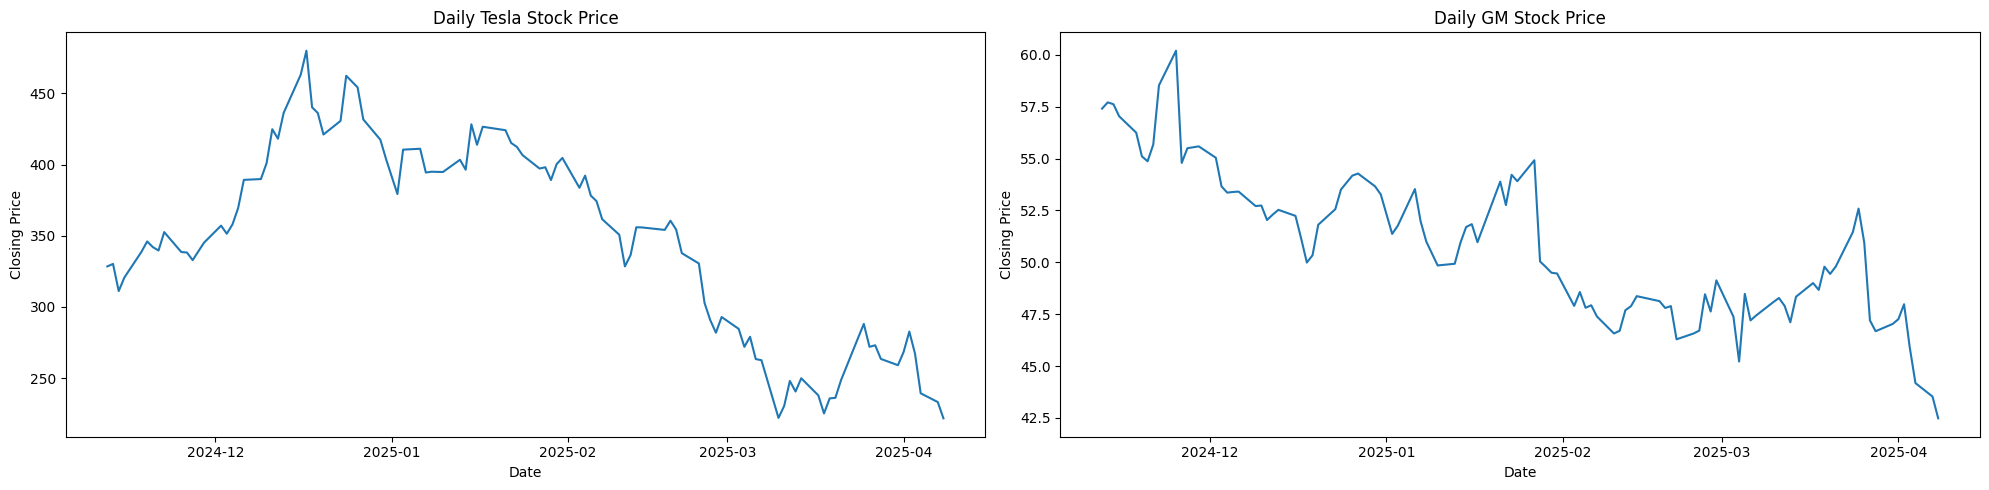

In [4]:
def get_stock_data(symbol):
  req = requests.get(
      base_url,
      params={
          "function": "TIME_SERIES_DAILY",
          "symbol": symbol,
          "apikey": api_key
      }
  )
  data = req.json()
  if 'Time Series (Daily)' not in data:
    print(f"Error fetching data for {symbol}: {data}")
    return None

  df = pd.DataFrame.from_dict(data['Time Series (Daily)'], orient='index')
  df = df.astype(float)
  df.index = pd.to_datetime(df.index)
  return df

tesla_data = get_stock_data('TSLA')
gm_data = get_stock_data('GM')


if tesla_data is not None and gm_data is not None:
  plt.figure(figsize=(20, 5))

  plt.subplot(1, 2, 1)
  plt.plot(tesla_data.index, tesla_data['4. close'])
  plt.title('Daily Tesla Stock Price')
  plt.xlabel('Date')
  plt.ylabel('Closing Price')

  plt.subplot(1, 2, 2)
  plt.plot(gm_data.index, gm_data['4. close'])
  plt.title('Daily GM Stock Price')
  plt.xlabel('Date')
  plt.ylabel('Closing Price')

  plt.tight_layout()
  plt.show()
else:
  print("I couldn't retrieve the data for both companies.")


**Problem 3**

Extract the `TIME_SERIES_MONTHLY` for the Home Depot and Lowes.  Create a boxplot using `seaborn` where the $x$-axis is the month, and the $y$-axis is the closing price of each stock respectively.  

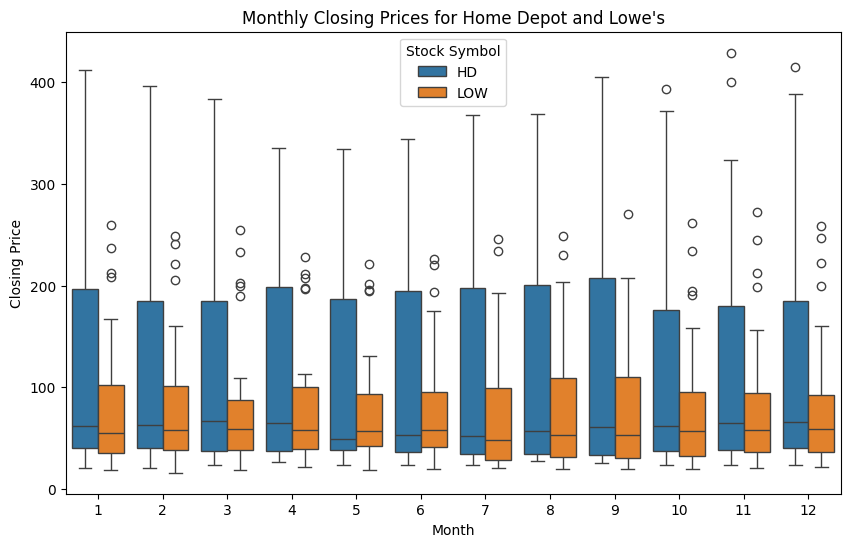

In [5]:
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "TIME_SERIES_MONTHLY",
        "symbol": "",
        "apikey": api_key
    }
)

def get_monthly_stock_data(symbol):
    req = requests.get(
        "https://www.alphavantage.co/query",
        params={
            "function": "TIME_SERIES_MONTHLY",
            "symbol": symbol,
            "apikey": api_key
        }
    )
    data = req.json()

    if 'Monthly Time Series' not in data:
        print(f"Error fetching data for {symbol}: {data}")
        return None

    df = pd.DataFrame.from_dict(data['Monthly Time Series'], orient='index')
    df = df.astype(float)
    df.index = pd.to_datetime(df.index)
    df['month'] = df.index.month
    df['symbol'] = symbol
    return df

hd_data = get_monthly_stock_data('HD')
low_data = get_monthly_stock_data('LOW')

if hd_data is not None and low_data is not None:
    combined_data = pd.concat([hd_data[['4. close', 'month', 'symbol']],
                               low_data[['4. close', 'month', 'symbol']]])
    combined_data.rename(columns={'4. close': 'Closing Price'}, inplace=True)

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='month', y='Closing Price', hue='symbol', data=combined_data)
    plt.title('Monthly Closing Prices for Home Depot and Lowe\'s')
    plt.xlabel('Month')
    plt.ylabel('Closing Price')
    plt.legend(title='Stock Symbol')
    plt.show()
else:
    print("Could not retrieve data for both Home Depot and Lowe's.")


**Problem 4**

Extract the `NEWS_SENTIMENT` for 200 articles related to Tesla stock.  Create a histogram of the sentiment scores from each article.  This boils down to extracting the `overall_sentiment_score` from each entry and plotting the results!

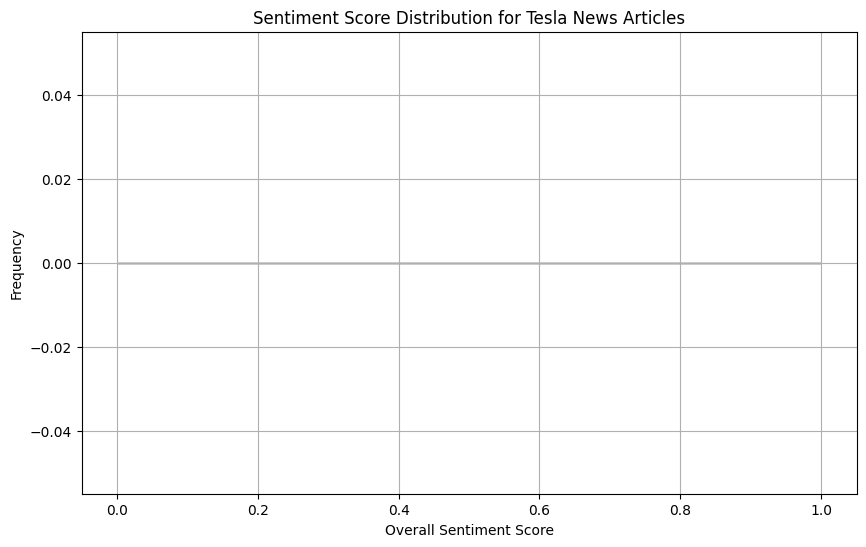

In [6]:
#update the parameters
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "NEWS_SENTIMENT",
        "tickers": "TSLA",
        "topics": "technology",
        "limit": 200,
        "apikey": api_key
    }
)

results = req.json()

if 'feed' not in results:
    print(f"Error fetching news sentiment data: {results}")
else:
    sentiment_scores = [article['overall_sentiment_score'] for article in results['feed'] if 'overall_sentiment_score' in article]

    plt.figure(figsize=(10, 6))
    plt.hist(sentiment_scores, bins=20, edgecolor='black')
    plt.title('Sentiment Score Distribution for Tesla News Articles')
    plt.xlabel('Overall Sentiment Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

**Problem 5**

Extract data related to retail sales from the last decade.  Create a side by side line plot and a boxplot for each month.  

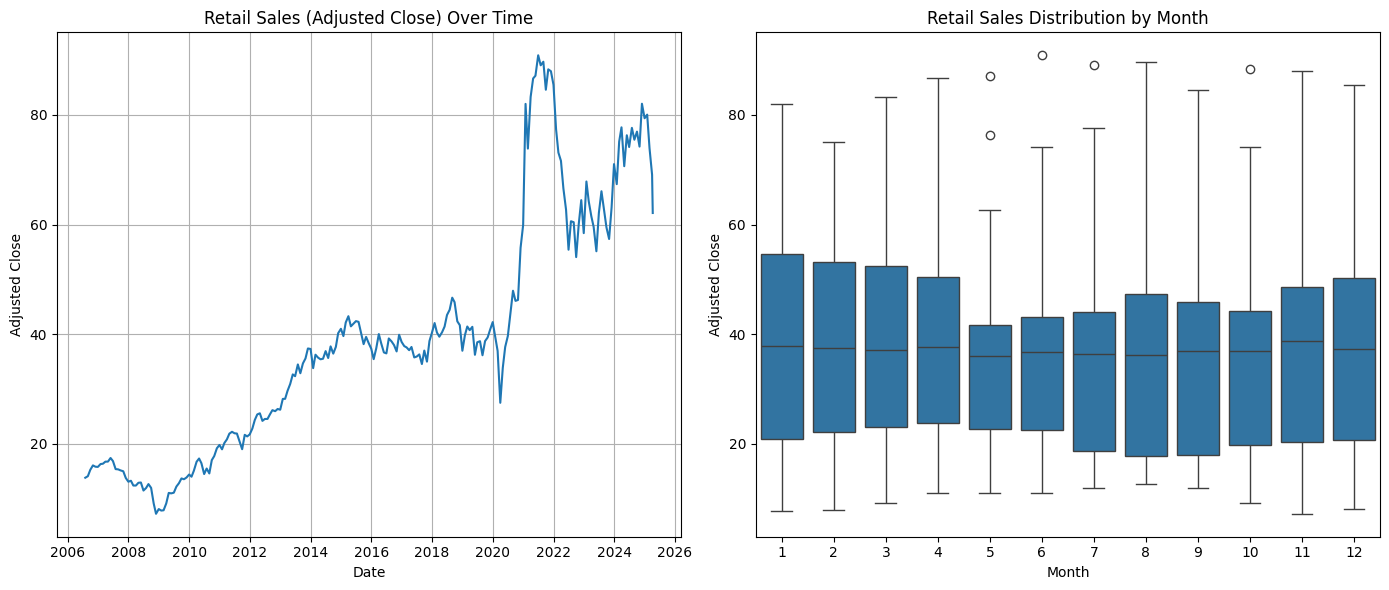

In [7]:
#update the parameters
base_url = 'https://www.alphavantage.co/query'
req = requests.get(
    base_url,
    params={
        "function": "TIME_SERIES_MONTHLY_ADJUSTED",
        "symbol": "XRT",
        "apikey": api_key
    }
)

results = req.json()

if 'Monthly Adjusted Time Series' not in results:
    print(f"Error fetching retail sales data: {results}")
else:
    retail_data = pd.DataFrame.from_dict(results['Monthly Adjusted Time Series'], orient='index')
    retail_data = retail_data.astype(float)
    retail_data.index = pd.to_datetime(retail_data.index)
    retail_data['month'] = retail_data.index.month
    retail_data['year'] = retail_data.index.year

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(retail_data.index, retail_data['5. adjusted close'], label='Adjusted Close')
    plt.title('Retail Sales (Adjusted Close) Over Time')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    sns.boxplot(x='month', y='5. adjusted close', data=retail_data)
    plt.title('Retail Sales Distribution by Month')
    plt.xlabel('Month')
    plt.ylabel('Adjusted Close')

    plt.tight_layout()
    plt.show()

**Problem 6**

Extract `REAL_GDP_PER_CAPITA` and fix the data so as to have a datetime index sorted from earliest to latest date.  Create a line plot using seaborn with appropriate labels and titles.

{'name': 'Real Gross Domestic Product per Capita', 'interval': 'quarterly', 'unit': 'chained 2012 dollars', 'data': [{'date': '2024-10-01', 'value': '69006.0'}, {'date': '2024-07-01', 'value': '68696.0'}, {'date': '2024-04-01', 'value': '68320.0'}, {'date': '2024-01-01', 'value': '67981.0'}, {'date': '2023-10-01', 'value': '67858.0'}, {'date': '2023-07-01', 'value': '67499.0'}, {'date': '2023-04-01', 'value': '66945.0'}, {'date': '2023-01-01', 'value': '66673.0'}, {'date': '2022-10-01', 'value': '66341.0'}, {'date': '2022-07-01', 'value': '65939.0'}, {'date': '2022-04-01', 'value': '65631.0'}, {'date': '2022-01-01', 'value': '65684.0'}, {'date': '2021-10-01', 'value': '65925.0'}, {'date': '2021-07-01', 'value': '64850.0'}, {'date': '2021-04-01', 'value': '64383.0'}, {'date': '2021-01-01', 'value': '63418.0'}, {'date': '2020-10-01', 'value': '62544.0'}, {'date': '2020-07-01', 'value': '61906.0'}, {'date': '2020-04-01', 'value': '57440.0'}, {'date': '2020-01-01', 'value': '62415.0'}, {'d

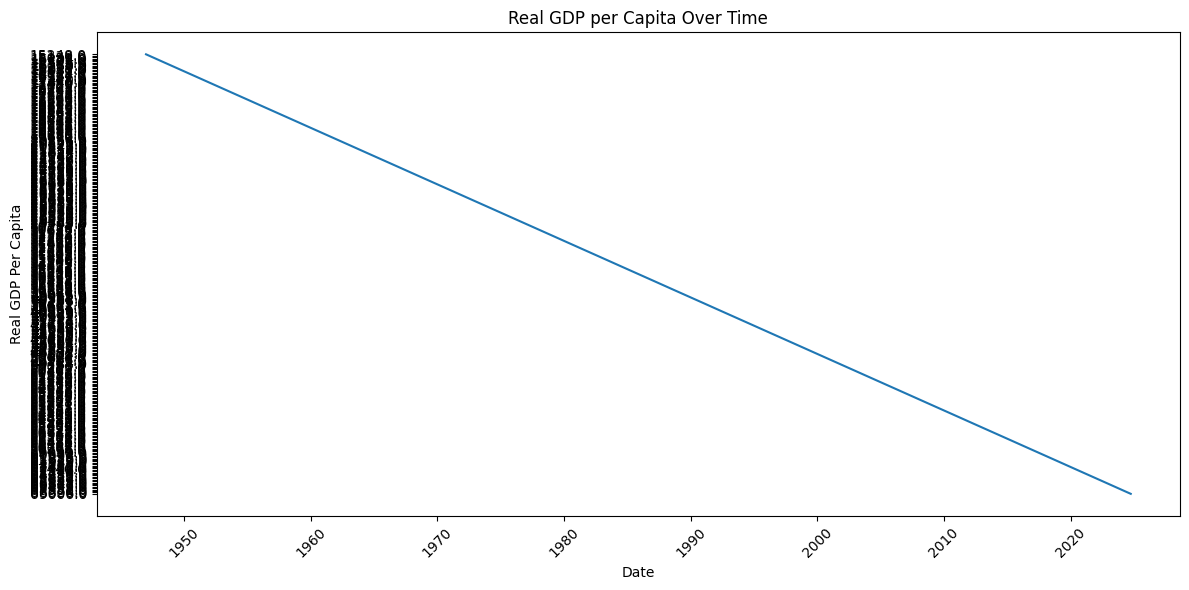

In [8]:
base_url = 'https://www.alphavantage.co/query'

params={
        "function": "REAL_GDP_PER_CAPITA",
        "apikey": api_key,
    'datatype': 'json'
}

response = requests.get(base_url, params=params)
data = response.json()

print(data)

if 'data' in data:
    df = pd.DataFrame(data['data'])
    df.rename(columns={'date': 'Date', 'value': 'Real_GDP_Per_Capita'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x=df.index, y='Real_GDP_Per_Capita')
    plt.title('Real GDP per Capita Over Time')
    plt.xlabel('Date')
    plt.ylabel('Real GDP Per Capita')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Error: Could not retrieve data")


**Problem 7**

Use the `yfinance` library to extract balance sheet data from two companies and determine the better investment using criteria of your choice.

In [9]:
import yfinance as yf

In [10]:
ticker_1 = 'TSLA'
ticker_2 = 'GM'

company_1 = yf.Ticker(ticker_1)
company_2 = yf.Ticker(ticker_2)

balance_sheet_1 = company_1.balance_sheet
balance_sheet_2 = company_2.balance_sheet

balance_sheet_1 = balance_sheet_1.T
balance_sheet_2 = balance_sheet_2.T

comparison_criteria = ['Total Assets', 'Total Liabilities Net Minority Interest', 'Stockholders Equity']

print(f"Balance Sheet for {ticker_1}:")
print(balance_sheet_1[comparison_criteria])

print(f"\nBalance Sheet for {ticker_2}:")
print(balance_sheet_2[comparison_criteria])

if balance_sheet_1['Total Assets'].iloc[0] > balance_sheet_2['Total Assets'].iloc[0]:
    print(f"\nBased on Total Assets, {ticker_1} is a better investment.")
else:
    print(f"\nBased on Total Assets, {ticker_2} is a better investment.")



Balance Sheet for TSLA:


KeyError: "None of [Index(['Total Assets', 'Total Liabilities Net Minority Interest',\n       'Stockholders Equity'],\n      dtype='object')] are in the [columns]"

**Problem 8**

Using the `yfinance` library, extract data for five ticker symbols from 2018 through present.  Create a grid of scatterplots with a regression line [using seaborns regplot](http://seaborn.pydata.org/tutorial/regression.html) of the different tickers closing prices.

[*********************100%***********************]  5 of 5 completed
<ipython-input-171-a7a1620e0179>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=45)
<ipython-input-171-a7a1620e0179>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([pd.Timestamp.fromordinal(int(label)).strftime('%Y-%m-%d') for label in ax.get_xticks()])


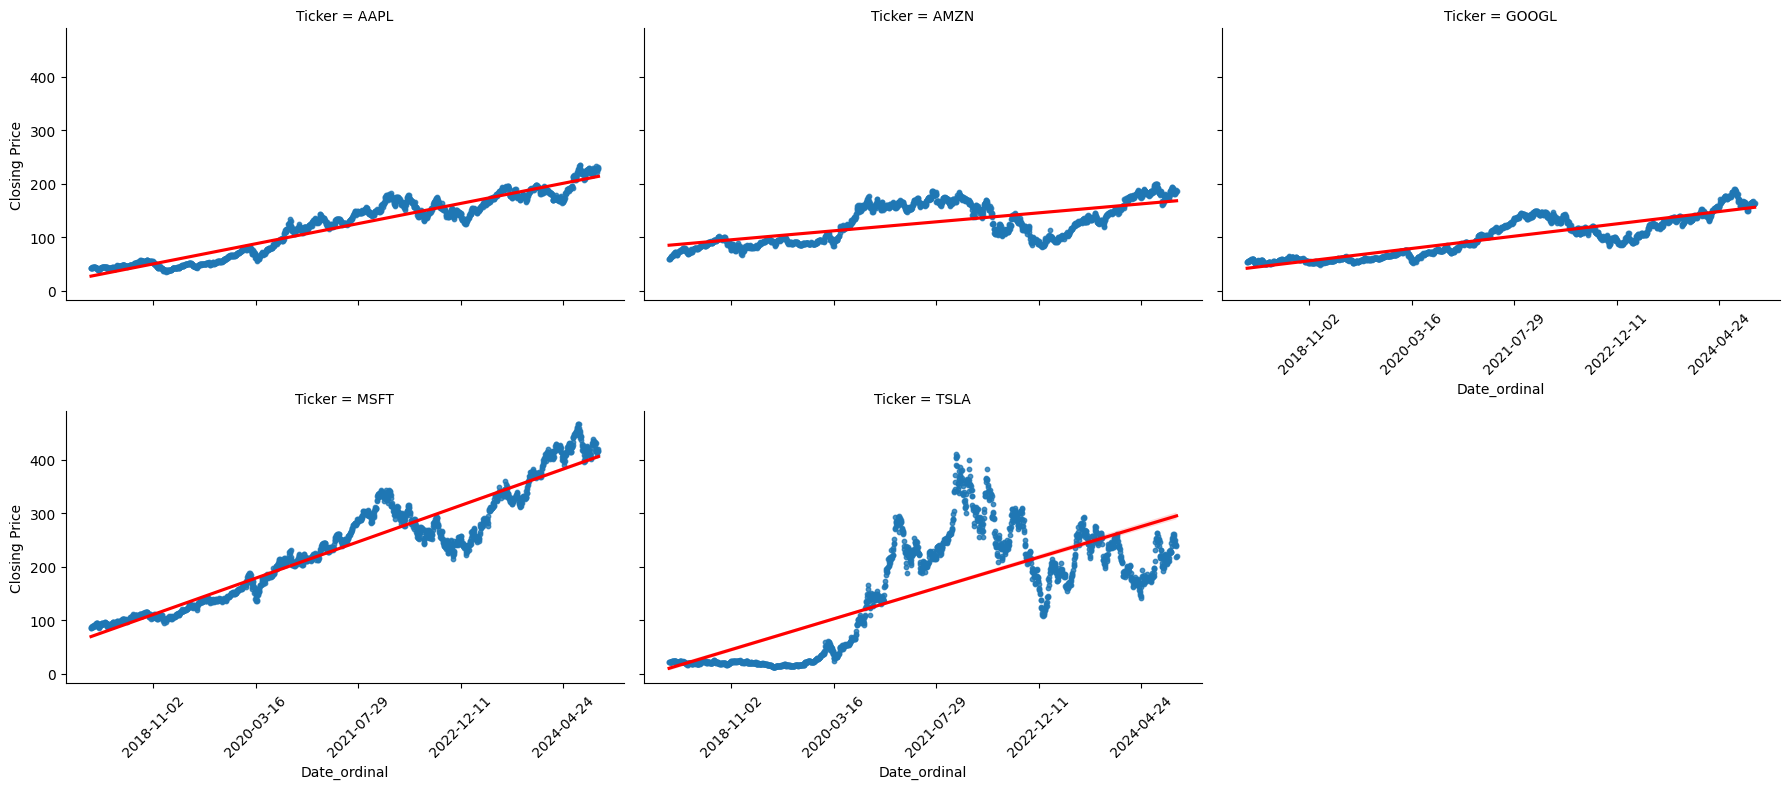

In [171]:
tickers = ['AAPL', 'MSFT', 'TSLA', 'GOOGL', 'AMZN']

data = yf.download(tickers, start='2018-01-01', end='2024-10-15')['Close']
data = data.reset_index()

# Convert the Date column to numeric format (ordinal)
data['Date_ordinal'] = pd.to_datetime(data['Date']).map(pd.Timestamp.toordinal)

melted_data = pd.melt(data, id_vars=['Date', 'Date_ordinal'], var_name='Ticker', value_name='Closing Price')

g = sns.FacetGrid(melted_data, col="Ticker", col_wrap=3, height=4, aspect=1.5)
g.map(sns.regplot, 'Date_ordinal', 'Closing Price', scatter_kws={'s': 10}, line_kws={"color": "red"})

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    # Convert numeric x-axis back to readable dates for display
    ax.set_xticklabels([pd.Timestamp.fromordinal(int(label)).strftime('%Y-%m-%d') for label in ax.get_xticks()])

plt.tight_layout()
plt.show()


**Problem 9**

Read through the documentation on the `resample` method in pandas [here](https://pandas.pydata.org/docs/user_guide/timeseries.html#resampling).  Use the resample method to extract the first closing price of the month for Apple stock since 2012.  

In [172]:
apple_data = yf.download('AAPL', start='2012-01-01', end='2024-10-15')

# Resample to get the first closing price of each month
monthly_first_closing = apple_data['Close'].resample('M').first()

print(monthly_first_closing)

[*********************100%***********************]  1 of 1 completed

Date
2012-01-31     14.686786
2012-02-29     16.292500
2012-03-31     19.445356
2012-04-30     22.093929
2012-05-31     20.790358
                 ...    
2024-06-30    194.029999
2024-07-31    216.750000
2024-08-31    218.360001
2024-09-30    222.770004
2024-10-31    226.210007
Freq: ME, Name: Close, Length: 154, dtype: float64



<ipython-input-172-ff08ad52597f>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_first_closing = apple_data['Close'].resample('M').first()


**Problem 10**

Read through the user guide on the `rolling` methods in pandas [here](https://pandas.pydata.org/docs/user_guide/window.html#rolling-window).  Use this to create side by side line plots of the closing price of NVIDIA stock since 2018 and the rolling 20 day mean for the closing price of NVIDIA.  What effect does the rolling mean have on the plot?

[*********************100%***********************]  1 of 1 completed


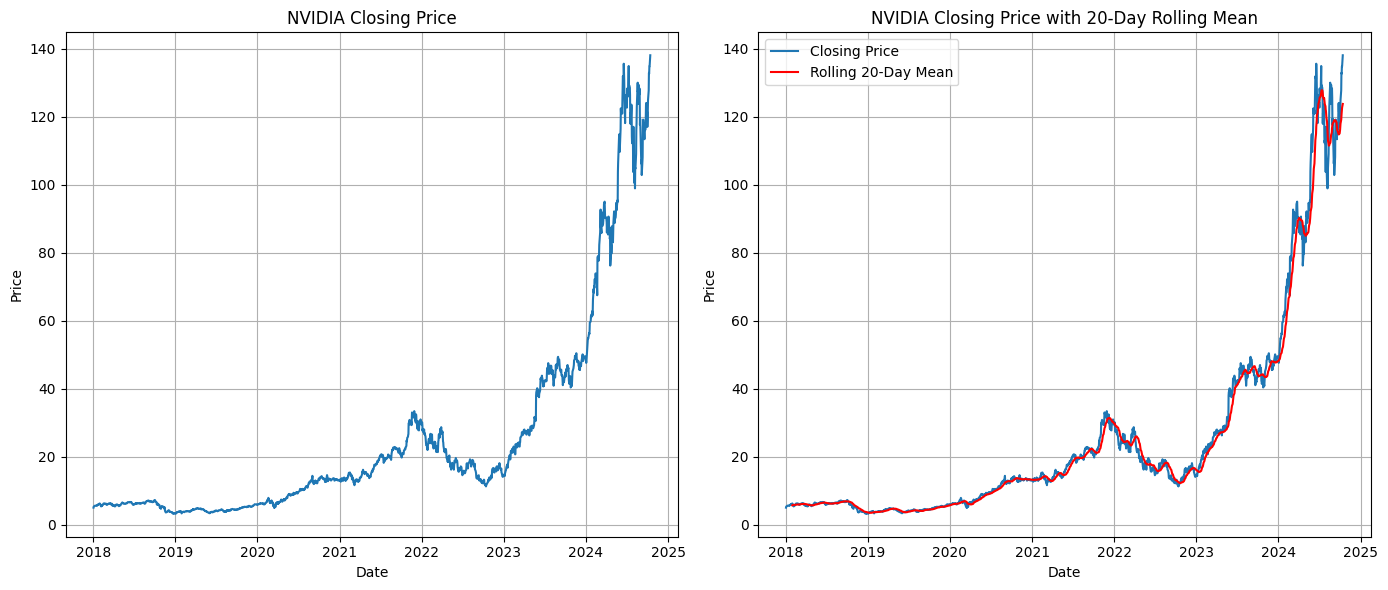

In [173]:
nvidia_data = yf.download('NVDA', start='2018-01-01', end='2024-10-15')
nvidia_data['Rolling_20_Mean'] = nvidia_data['Close'].rolling(window=20).mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(nvidia_data.index, nvidia_data['Close'], label='Closing Price')
plt.title('NVIDIA Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(nvidia_data.index, nvidia_data['Close'], label='Closing Price')
plt.plot(nvidia_data.index, nvidia_data['Rolling_20_Mean'], label='Rolling 20-Day Mean', color='red')
plt.title('NVIDIA Closing Price with 20-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Problem 11**

arXiv is an open source space for academic papers to be published.  They have a freely accessible API [here](https://info.arxiv.org/help/api/user-manual.html#arxiv-api-users-manual).  In order to parse the responses, you will need to use the BeautifulSoup library and turn the text of the response into a soup object that is then searched.

Your objective is to write a function that takes in a search term and returns a `DataFrame` with the article date, title, authors, summary, and article url as columns of the `DataFrame`.

In [174]:
from bs4 import BeautifulSoup

def arXiv_data(search_terms):
    base_url = 'http://export.arxiv.org/api/query'
    params = {
        'search_query': search_terms,
        'start': 0,
        'max_results': 10
    }

    response = requests.get(base_url, params=params)
    soup = BeautifulSoup(response.text, 'xml')

    titles = [entry.title.text for entry in soup.find_all('entry')]
    authors = [', '.join(author.find('name').text for author in entry.find_all('author')) for entry in soup.find_all('entry')]
    summaries = [entry.summary.text.strip() for entry in soup.find_all('entry')]
    published_dates = [entry.published.text for entry in soup.find_all('entry')]
    article_urls = [entry.id.text for entry in soup.find_all('entry')]

    df = pd.DataFrame({
        'Title': titles,
        'Authors': authors,
        'Summary': summaries,
        'Published Date': published_dates,
        'Article URL': article_urls
    })

    return df



**Problem 12**

The world bank has a Python wrapper for its api called `wbgapi`.  Examine the documentation [here](https://pypi.org/project/wbgapi/) and chose an endpoint(s) to query.  Find at least two endpoints of interest and create visualizations of this data.  Write a sentence or two about what you've found.

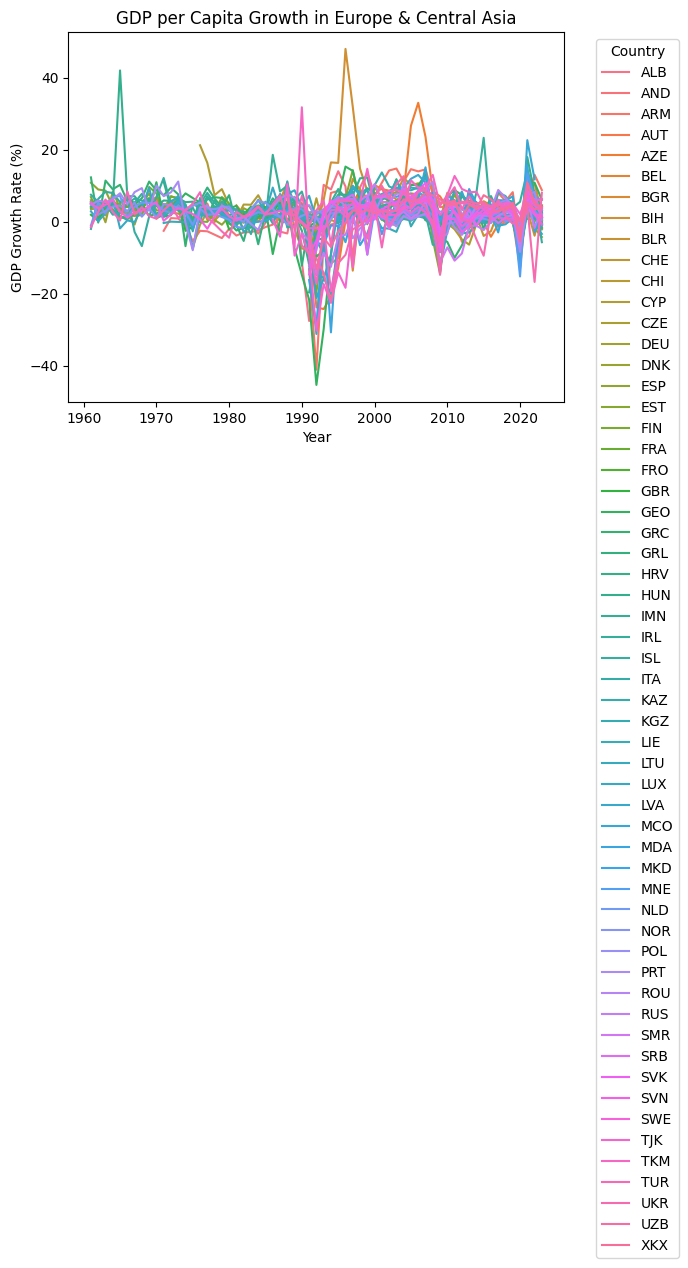

In [175]:
from datetime import datetime, timedelta

!pip install wbgapi

import wbgapi as wb


gdp_data = wb.data.DataFrame('NY.GDP.PCAP.KD.ZG', wb.region.members('ECS'))

gdp_data = gdp_data.stack().reset_index()

gdp_data = gdp_data.rename(columns={'economy': 'Country', 'level_1': 'Year', 0: 'GDP Growth'})
gdp_data['Year'] = gdp_data['Year'].str[2:].astype(int)
sns.lineplot(x='Year', y='GDP Growth', hue='Country', data=gdp_data)
plt.title('GDP per Capita Growth in Europe & Central Asia')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Problem 13**

Use `requests` and `BeautifulSoup` to scrape and format the most recent 100 album reviews from [Pitchfork](https://pitchfork.com/reviews/albums/).  Create a `DataFrame` that includes the album, artist, genre, reviewer, score, and review text for each of these albums. Write your `DataFrame` to a `.csv` file called `pitchfork_reviews.csv`.

**HINT**: An important part of this will be to extract a url to the full review and use it to make another request from which you can pull the score and review text.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = 'https://pitchfork.com/reviews/albums/'
response = requests.get(base_url)
soup = BeautifulSoup(response.content, 'html.parser')

reviews = soup.find_all('div', class_='review')

albums = []
artists = []
genres = []
reviewers = []
scores = []
review_texts = []
review_urls = []

for review in reviews:
    album = review.find('h2', class_='review__title-album').text.strip()
    artist = review.find('ul', class_='artist-list').text.strip()
    genre = review.find('a', class_='genre-list__link').text.strip()
    review_url = 'https://pitchfork.com' + review.find('a', class_='review__link')['href']

    review_response = requests.get(review_url)
    review_soup = BeautifulSoup(review_response.content, 'html.parser')

    score = review_soup.find('span', class_='score').text.strip()
    review_text = review_soup.find('div', class_='review-detail__abstract').text.strip()
    reviewer = review_soup.find('a', class_='authors-detail__display-name').text.strip()

    albums.append(album)
    artists.append(artist)
    genres.append(genre)
    reviewers.append(reviewer)
    scores.append(score)
    review_texts.append(review_text)
    review_urls.append(review_url)

df = pd.DataFrame({
    'Album': albums,
    'Artist': artists,
    'Genre': genres,
    'Reviewer': reviewers,
    'Score': scores,
    'Review Text': review_texts,
    'Review URL': review_urls
})

df.to_csv('pitchfork_reviews.csv', index=False)


**Problem 14**

Find an api of interest to you.  Ask a specific question that you want to use the data from the api to answer, make an appropriate request of the endpoints and do your best to provide an answer to your question asked.

-------
For example, maybe I'm interested in finding out recent artists similar to Rod Stewart.  I could use the LastFM api for this.  Perhaps you're interested in a lyrical analysis of Drake vs. Kendrick Lamar -- and want to compare the lexical diversity of different tracks; you can use the genius api for this.  Maybe I want to build an app to show a random cat picture with a dad joke.  The cat api and jokes api might work here.


KeyError: 'coord'

**Problem 15**

Use the `praw` api [here](https://praw.readthedocs.io/en/stable/) to extract posts from the `r/nyu` subreddit.  What posts are getting the most activity?

**BONUS**

Using the [Dog API](https://dog.ceo/dog-api/), create a 2 X 5 grid of images of random dogs.  You will need to create subplots and you can use the axes `.imshow()` method.